# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
#assemble base url

base_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

#take response stream and read to completion-parse through JavaScript Object Notation(JSON) value of data type 
response = requests.get(base_url).json()

#json.dumps() function converts a Python object into a json() string
print(json.dumps(response, indent=4, sort_keys=True))



# Lists to hold info
city_name = []
lat = []
lng = []
temp_max = []
temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

units = 'metric'
# Start count for cities and sets
city_count = 0
set_count = 1


base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}&units=imperial&appid={weather_api_key}&units={units}&q="
response = requests.get(base_url).json()

# For loop to get City, Lat, Lng, Max, Temp, Humidity, Cloudiness, Wind Speed, Country, Date and append to lists
for city in cities:
    
    #query for selected data points
    try:
        if city_count == 50:
            city_count = 0
            set_count = set_count + 1
        response = requests.get(query_url + city).json()
        city_count = city_count + 1
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])      
        
        #print results within for loop
        print(f'Processing Record {city_count} of Set {set_count} | {city}')
     
    #if error is thrown skip to next query in loop
    except:
        print("City not found. Skipping...")
    
  

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -21.2,
        "lon": -175.2
    },
    "dt": 1618367277,
    "id": 4032243,
    "main": {
        "feels_like": 302.35,
        "humidity": 74,
        "pressure": 1010,
        "temp": 300.15,
        "temp_max": 300.15,
        "temp_min": 300.15
    },
    "name": "Vaini",
    "sys": {
        "country": "TO",
        "id": 7285,
        "sunrise": 1618422734,
        "sunset": 1618464551,
        "type": 1
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 3.09
    }
}
Processing Record 1 of Set 1 | bluff
City not found. Skipping...
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | zhigansk

Processing Record 36 of Set 4 | inirida
Processing Record 37 of Set 4 | souillac
Processing Record 38 of Set 4 | kragero
Processing Record 39 of Set 4 | kroonstad
Processing Record 40 of Set 4 | linhares
Processing Record 41 of Set 4 | gaoua
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | bosaso
Processing Record 44 of Set 4 | nautla
Processing Record 45 of Set 4 | yumen
Processing Record 46 of Set 4 | deputatskiy
Processing Record 47 of Set 4 | poronaysk
Processing Record 48 of Set 4 | vilyuysk
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | cullen
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | livingston
Processing Record 4 of Set 5 | sabha
Processing Record 5 of Set 5 | roald
City not found. Skipping...
Processing Record 7 of Set 5 | agadir
Processing Record 8 of Set 5 | sola
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 5 | khor
P

Processing Record 43 of Set 8 | cap malheureux
Processing Record 44 of Set 8 | vagur
Processing Record 45 of Set 8 | nome
Processing Record 46 of Set 8 | teya
City not found. Skipping...
Processing Record 48 of Set 8 | krasnoborsk
Processing Record 49 of Set 8 | jintur
Processing Record 50 of Set 8 | nikko
Processing Record 1 of Set 9 | karratha
Processing Record 2 of Set 9 | babu
Processing Record 3 of Set 9 | lorengau
Processing Record 4 of Set 9 | kajaani
Processing Record 5 of Set 9 | elko
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 9 | malatya
Processing Record 9 of Set 9 | yaan
Processing Record 10 of Set 9 | usinsk
Processing Record 11 of Set 9 | sept-iles
Processing Record 12 of Set 9 | yakeshi
Processing Record 13 of Set 9 | kazachinskoye
Processing Record 14 of Set 9 | mildura
Processing Record 15 of Set 9 | haimen
Processing Record 16 of Set 9 | meadow lake
Processing Record 17 of Set 9 | la rioja
Processing Record 18 of Set 9 | kuala t

Processing Record 46 of Set 12 | atar
Processing Record 47 of Set 12 | kidal
Processing Record 48 of Set 12 | solnechnyy
Processing Record 49 of Set 12 | bereda
Processing Record 50 of Set 12 | saint-augustin
Processing Record 1 of Set 13 | port blair
Processing Record 2 of Set 13 | ler
Processing Record 3 of Set 13 | ponta delgada
Processing Record 4 of Set 13 | vesoul
Processing Record 5 of Set 13 | teguldet
Processing Record 6 of Set 13 | kribi
Processing Record 7 of Set 13 | kropotkin
Processing Record 8 of Set 13 | rockport
Processing Record 9 of Set 13 | puerto madero
Processing Record 10 of Set 13 | havelock
Processing Record 11 of Set 13 | sioux lookout
Processing Record 12 of Set 13 | sao raimundo nonato
Processing Record 13 of Set 13 | oyem
Processing Record 14 of Set 13 | wajir
City not found. Skipping...
Processing Record 16 of Set 13 | awbari
Processing Record 17 of Set 13 | cordoba
Processing Record 18 of Set 13 | san-pedro
Processing Record 19 of Set 13 | mount isa
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## 

In [100]:
#assemble data in dataframe
weather_df = pd.DataFrame({"City":city_name,
                          "City Lat": lat,
                          "City Long": lng,
                          "Max Temp": temp_max,
                          "Humidity": humidity,
                          "Cloud Coverage": clouds,
                          "Wind Speed": wind,
                          "City Country": country,
                          "City Datetime":
                           date})


weather_df.to_csv(path_or_buf = output_data_file)
weather_df.head(20)


,City,City Lat,City Long,Max Temp,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Bluff,-46.6000,168.3333,53.01,88,100,4.00,NZ,1618367277
1,Port Elizabeth,-33.9180,25.5701,66.20,94,90,10.36,ZA,1618367278
2,Rikitea,-23.1203,-134.9692,77.70,66,7,6.82,PF,1618367278
3,Zhigansk,66.7697,123.3711,19.54,87,100,21.00,RU,1618367279
4,Bandarbeyla,9.4942,50.8122,78.49,75,72,5.41,SO,1618367279
5,Mataura,-46.1927,168.8643,53.01,88,100,4.00,NZ,1618367280
6,New Norfolk,-42.7826,147.0587,64.99,73,87,5.99,AU,1618367280
7,Ushuaia,-54.8000,-68.3000,46.40,76,90,18.41,AR,1618367281
8,Caramay,10.1815,119.2360,85.50,64,95,3.74,PH,1618367281
9,Shache,38.4167,77.2406,57.36,31,70,3.51,CN,1618367282


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [103]:
humid_af = weather_df[weather_df['Humidity']> 100]
humid_af


,City,City Lat,City Long,Max Temp,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime


In [49]:
#  Get the indices of cities that have humidity over 100%.
display(humid_af)

,City,City Lat,City Long,Max Temp,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime


In [50]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[weather_df['Humidity']<= 100]


In [51]:
display(clean_city_data)
display(clean_city_data.describe())

,City,City Lat,City Long,Max Temp,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Bluff,-46.6000,168.3333,53.01,88,100,4.00,NZ,1618367277
1,Port Elizabeth,-33.9180,25.5701,66.20,94,90,10.36,ZA,1618367278
2,Rikitea,-23.1203,-134.9692,77.70,66,7,6.82,PF,1618367278
3,Zhigansk,66.7697,123.3711,19.54,87,100,21.00,RU,1618367279
4,Bandarbeyla,9.4942,50.8122,78.49,75,72,5.41,SO,1618367279
...,...,...,...,...,...,...,...,...,...
577,Hobyo,5.3505,48.5268,80.96,66,99,8.30,SO,1618367575
578,Clifton,40.8584,-74.1638,57.99,62,90,2.46,US,1618367298
579,Otjiwarongo,-20.4637,16.6477,60.31,41,0,15.37,NA,1618367576
580,Béziers,43.3476,3.2190,39.20,70,0,6.91,FR,1618367576


,City Lat,City Long,Max Temp,Humidity,Cloud Coverage,Wind Speed,City Datetime
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,20.418581,16.243232,59.536014,70.118557,52.819588,7.809296,1.618367e+09
std,32.896038,89.309296,21.335503,21.820691,39.787821,5.386963,9.978706e+01
min,-54.800000,-179.166700,-11.360000,8.000000,0.000000,0.310000,1.618367e+09
25%,-5.943550,-65.086350,42.800000,59.000000,8.000000,3.565000,1.618367e+09
50%,22.622500,19.908150,63.480000,75.000000,64.000000,6.910000,1.618367e+09
75%,48.056125,93.248750,77.955000,88.000000,92.750000,10.360000,1.618367e+09
max,78.218600,178.416700,95.050000,100.000000,100.000000,31.070000,1.618368e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

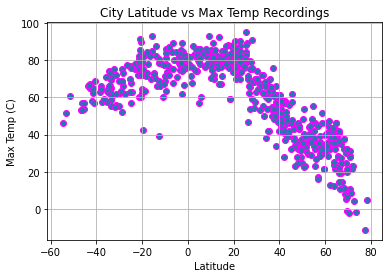

In [52]:
plt.scatter(lat, temp_max, edgecolors='fuchsia')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("City Latitude vs Max Temp Recordings")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

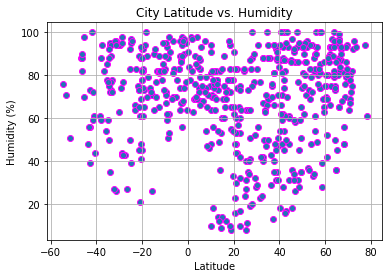

In [53]:
plt.scatter(lat, humidity, edgecolors="fuchsia")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

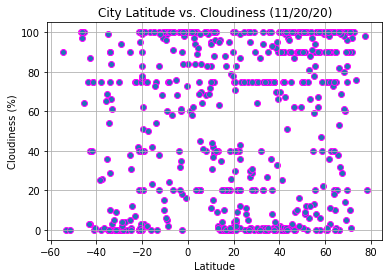

In [54]:
plt.scatter(lat, clouds, edgecolors="fuchsia", )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/20/20)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

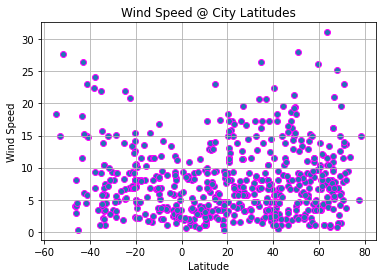

In [55]:
plt.scatter(lat, wind, edgecolors="fuchsia")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed @ City Latitudes")
plt.grid()
plt.show()

## Linear Regression

In [57]:
#define lat north and south of the equator
north = clean_city_data[clean_city_data['City Lat']>=0]
south = clean_city_data[clean_city_data['City Lat']<=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

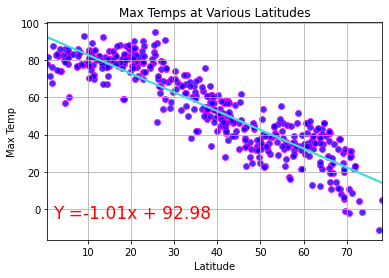

The R value is: -0.9024413400569031


In [92]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = north['City Lat'], y = north['Max Temp'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=north['City Lat'], y= north['Max Temp'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Max Temps at Various Latitudes")
plt.text(2, -5, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

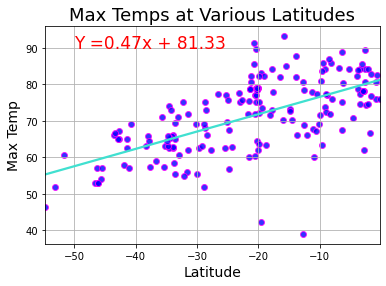

The R value is: 0.6269496762839443


In [93]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = south['City Lat'], y = south['Max Temp'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=south['City Lat'], y= south['Max Temp'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp', fontsize=14)
plt.title("Max Temps at Various Latitudes", fontsize=18)
plt.text(-50, 90, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

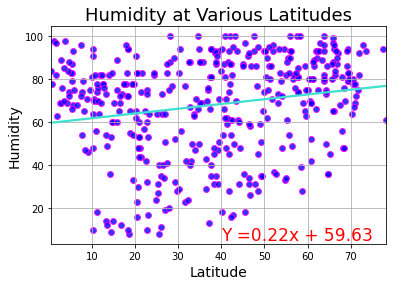

The R value is: 0.1966471206795718


In [94]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = north['City Lat'], y = north['Humidity'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=north['City Lat'], y= north['Humidity'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity',fontsize=14)
plt.title("Humidity at Various Latitudes", fontsize=18)
plt.text(40, 5, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

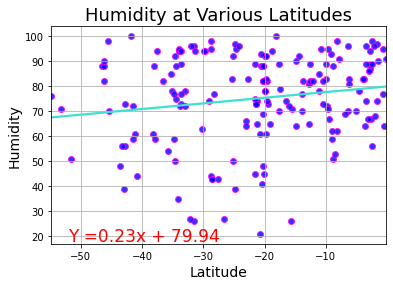

The R value is: 0.17020212073222302


In [95]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = south['City Lat'], y = south['Humidity'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=south['City Lat'], y= south['Humidity'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.title("Humidity at Various Latitudes", fontsize=18)
plt.text(-52, 18, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

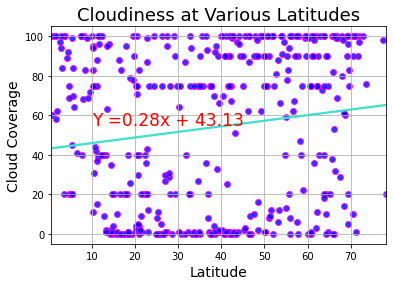

The R value is: 0.14463506190739153


In [96]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = north['City Lat'], y = north['Cloud Coverage'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=north['City Lat'], y= north['Cloud Coverage'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloud Coverage',fontsize=14)
plt.title("Cloudiness at Various Latitudes", fontsize=18)
plt.text(10, 55, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

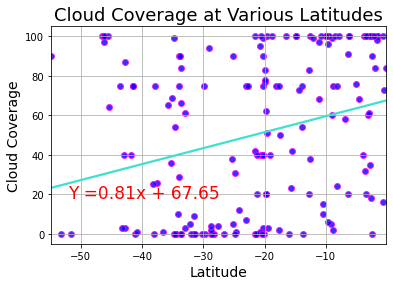

The R value is: 0.2755659186329109


In [97]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = south['City Lat'], y = south['Cloud Coverage'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=south['City Lat'], y= south['Cloud Coverage'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloud Coverage', fontsize=14)
plt.title("Cloud Coverage at Various Latitudes", fontsize=18)
plt.text(-52, 18, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

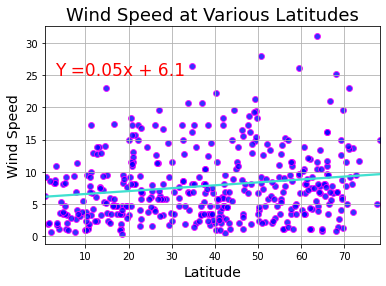

The R value is: 0.169916767840759


In [98]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = north['City Lat'], y = north['Wind Speed'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=north['City Lat'], y= north['Wind Speed'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed',fontsize=14)
plt.title("Wind Speed at Various Latitudes", fontsize=18)
plt.text(3, 25, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

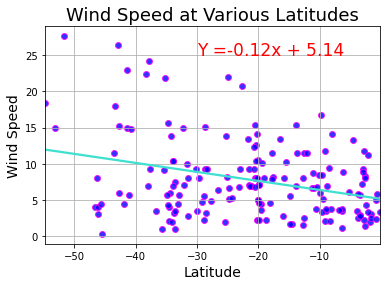

The R value is: -0.3160179009812345


In [91]:
#set variables for linear regression scipi function
slope, intercept, r_value, p_value, std_err = linregress(x = south['City Lat'], y = south['Wind Speed'])

#seaborn regression plot as per JBZ guidance(Thanks Homie)
sns.regplot(x=south['City Lat'], y= south['Wind Speed'], scatter_kws={"color": "blue", "edgecolors": "fuchsia"}, line_kws={"color": "turquoise"}, ci=0)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed', fontsize=14)
plt.title("Wind Speed at Various Latitudes", fontsize=18)
plt.text(-30, 25, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red');
plt.grid()
plt.show()
print(f'The R value is: {r_value}')